In [1]:
from CellularAutomaton import *
from IPython.display import display
import inspect
from math import *
%matplotlib inline
import matplotlib
from random import random
from matplotlib import pyplot as plt
from matplotlib import animation
matplotlib.rc('animation', html='html5')
goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio
def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

In [8]:
class firegrid(CAGrid):
    def SetValue(self):
        print('in set value')
        for y in range(rows):
            for x in range(columns):
                if self['Burning'][y][x]:
                    self['Value'][y][x]=(1,0,0)
                elif self['Tree'][y][x]:
                    self['Value'][y][x]=(0,1,0)
                else:
                    self['Value'][y][x]=(0,0,1)
    def Update(self):
        numpy.place(self.cond,self.TrueArray,False) #initialize condition with false values
        for n in self.Neighbors:
            numpy.place(self.cond, n['Burning'],True) #if neighbor is burning, condition =true (will use later)
        
        #if cell is burning, set cell to empty on next iteration
        numpy.place(self['Empty'],self['Burning'],True)
        numpy.place(self['Burning'],self['Burning'],False) 
        numpy.place(self['Tree'],self['Empty'],False) #Could have used 'Tree', 'Burning'
        
        numpy.place(self['Burning'],self.cond, True) #if neighbor burning and tree set cell to burning on next iteration
        numpy.place(self['Burning'], self['Empty'],False) #if not a tree, will not burn in next iteration
        self.SetValue()
        self.SetBoundary()

In [9]:
def init(grid, rows, columns, probtree, probburning):
        for y in range(rows):
            for x in range(columns):
                #grid['ProbImmune'][y][x]  = random() * 4
                if random() < probtree:
                    MyGrid['Empty'][y][x]   = False
                    MyGrid['Tree'][y][x]    = True
                    MyGrid['Burning'][y][x] = random() < probburning
                else:
                    MyGrid['Empty'][y][x]   = True
                    MyGrid['Tree'][y][x]    = False
                    MyGrid['Burning'][y][x] = False
            grid.SetValue()
            grid.SetBoundary()

In [10]:
MyDtype = numpy.dtype([('Value','f', (3,)),('Empty',bool),('Tree',bool),('Burning',bool)])

#def setstates(grid, rows, columns, states):
 #   print('in set states')
    #i=0
    #for y in range(rows):
    #    for x in range(columns):
     #       grid["Empty"][y][x]=states[i]
            #i = i + 1
    #i=0
    #for y in range(rows):
     #   for x in range(columns):
      #      grid["Tree"][y][x]=states[i]
       #     i = i + 1
    #i=0
    #for y in range(rows):
     #   for x in range(columns):
      #      grid["Burning"][y][x]=states[i]
       #     i = i + 1 
    #grid.SetValue()
    #grid.SetBoundary()

In [11]:
#print(numpy.place.__doc__)

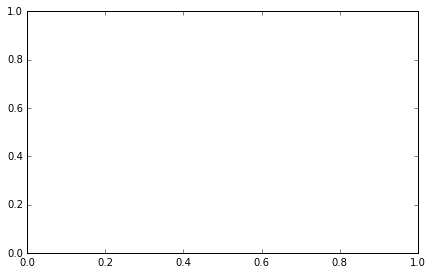

In [12]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

In [28]:
rows = 3
columns = 3
MyGrid=firegrid((rows,columns),MyDtype)
#setstates(MyGrid, rows, columns, (0,1,0,1,0,1,0,1,0,))
#init(MyGrid,rows,columns,.4, .5)
init(MyGrid,rows,columns,0.80,0.1)
#print('Empty:')
#print(MyGrid['Empty'])
#print('Tree:')
#print(MyGrid['Tree'])
#print('Burning:')
#print(MyGrid['Burning'])
#print(MyGrid['Value'])
#MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
#MyFigure

in set value
in set value
in set value


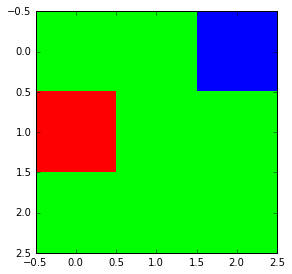

In [22]:
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

In [27]:
MyGrid.Update()
#print('Empty:')
#print(MyGrid['Empty'])
#print('Tree:')
#print(MyGrid['Tree'])
#print('Burning:')
#print(MyGrid['Burning'])

in set value


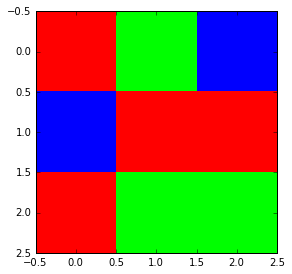

In [24]:
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

in set value


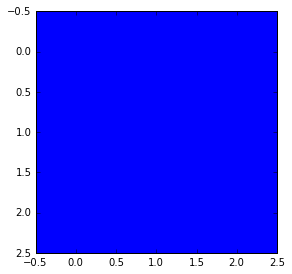

In [26]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

In [36]:
def uf():
    MyGrid.Update()
    MyAxes.matshow(MyGrid['Value'])
    MyFigure

in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value
in set value


in set value
in set value
in set value


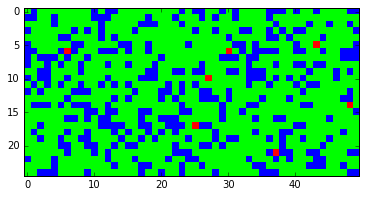

In [31]:
rows = 25
columns = 50
MyGrid=firegrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree=0.75, probburning=0.01)
#SmallGrid01=FireGridCopy(MyGrid)
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [32]:
AnimationFrames = 50  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 2.5 seconds long.


In [35]:
MyAnimation = animation.FuncAnimation(MyFigure, firegrid,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

TypeError: 'int' object is not iterable